In [268]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import numpy as np
from sklearn.preprocessing import MinMaxScaler
growth = pd.read_csv('/home/jy/0_Experiments/gunwi/22-23_Growth.csv')
growth.head()

,Date,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter,Position
0,2022-10-21,5,23.7,16.8,7.2,5.5,10.65,1
1,2022-10-21,4,21.7,14.6,6.7,5.6,9.66,2
2,2022-10-21,4,18.6,12.2,5.2,4.2,10.92,3
3,2022-10-21,4,26.0,16.4,7.0,5.5,11.01,4
4,2022-10-21,4,21.5,13.8,7.3,6.7,11.23,5


In [269]:
growth2 = growth.drop(['Position'], axis = 1)
growth2.head()

,Date,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
0,2022-10-21,5,23.7,16.8,7.2,5.5,10.65
1,2022-10-21,4,21.7,14.6,6.7,5.6,9.66
2,2022-10-21,4,18.6,12.2,5.2,4.2,10.92
3,2022-10-21,4,26.0,16.4,7.0,5.5,11.01
4,2022-10-21,4,21.5,13.8,7.3,6.7,11.23


In [270]:
growth2.dtypes

Date              object
LeafNumber         int64
PlantHeight      float64
PetioleLength    float64
LeafLength       float64
LeafWidth        float64
CrownDiameter    float64
dtype: object

In [271]:
growth2['Date'] = pd.to_datetime(growth2['Date'])

In [272]:
growth2.dtypes

Date             datetime64[ns]
LeafNumber                int64
PlantHeight             float64
PetioleLength           float64
LeafLength              float64
LeafWidth               float64
CrownDiameter           float64
dtype: object

In [273]:
growth3 = growth2.groupby('Date').mean()

In [274]:
growth3.head()

,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
Date,,,,,,
2022-10-21,4.166667,21.755556,14.433333,6.722222,5.527778,11.189444
2022-11-07,6.055556,20.944444,12.866667,8.022222,7.005556,12.677222
2022-11-18,6.722222,20.761111,13.005556,8.283333,7.144444,13.878333
2022-12-02,7.666667,18.394444,9.766667,8.116667,6.900000,14.025000
2022-12-15,8.000000,18.900000,9.827778,8.011111,6.894444,14.315000


In [275]:
growth3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2022-10-21 to 2023-02-09
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LeafNumber     9 non-null      float64
 1   PlantHeight    9 non-null      float64
 2   PetioleLength  9 non-null      float64
 3   LeafLength     9 non-null      float64
 4   LeafWidth      9 non-null      float64
 5   CrownDiameter  9 non-null      float64
dtypes: float64(6)
memory usage: 504.0 bytes


In [276]:
growth3.describe()

,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,7.043210,19.522840,10.853086,7.462346,6.441358,13.629815
std,1.296296,1.282402,1.995982,0.749067,0.664616,1.078944
min,4.166667,18.133333,9.183333,6.100000,5.311111,11.189444
25%,6.722222,18.900000,9.461111,6.977778,6.100000,13.482778
50%,7.666667,18.938889,9.788889,7.722222,6.711111,14.025000
75%,8.000000,20.761111,12.866667,8.022222,6.900000,14.275000
max,8.111111,21.755556,14.433333,8.283333,7.144444,14.635000


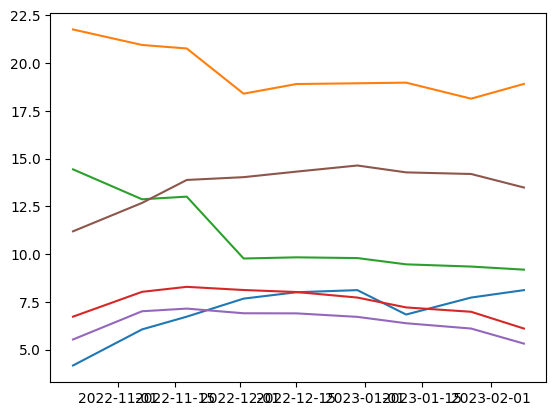

In [277]:
plt.plot(growth3)

In [278]:
growth4 = growth3.reset_index()
growth4['Date'] = pd.to_datetime(growth4['Date'])
growth4.head()

,Date,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
0,2022-10-21,4.166667,21.755556,14.433333,6.722222,5.527778,11.189444
1,2022-11-07,6.055556,20.944444,12.866667,8.022222,7.005556,12.677222
2,2022-11-18,6.722222,20.761111,13.005556,8.283333,7.144444,13.878333
3,2022-12-02,7.666667,18.394444,9.766667,8.116667,6.900000,14.025000
4,2022-12-15,8.000000,18.900000,9.827778,8.011111,6.894444,14.315000


In [279]:
growth4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9 non-null      datetime64[ns]
 1   LeafNumber     9 non-null      float64       
 2   PlantHeight    9 non-null      float64       
 3   PetioleLength  9 non-null      float64       
 4   LeafLength     9 non-null      float64       
 5   LeafWidth      9 non-null      float64       
 6   CrownDiameter  9 non-null      float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 632.0 bytes


In [280]:
growth4['Date'] = growth4['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [281]:
growth4.head()

,Date,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
0,2022-10-21 00:00:00,4.166667,21.755556,14.433333,6.722222,5.527778,11.189444
1,2022-11-07 00:00:00,6.055556,20.944444,12.866667,8.022222,7.005556,12.677222
2,2022-11-18 00:00:00,6.722222,20.761111,13.005556,8.283333,7.144444,13.878333
3,2022-12-02 00:00:00,7.666667,18.394444,9.766667,8.116667,6.900000,14.025000
4,2022-12-15 00:00:00,8.000000,18.900000,9.827778,8.011111,6.894444,14.315000


In [282]:
growth4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9 non-null      object 
 1   LeafNumber     9 non-null      float64
 2   PlantHeight    9 non-null      float64
 3   PetioleLength  9 non-null      float64
 4   LeafLength     9 non-null      float64
 5   LeafWidth      9 non-null      float64
 6   CrownDiameter  9 non-null      float64
dtypes: float64(6), object(1)
memory usage: 632.0+ bytes


In [283]:
growth4['Date'] = pd.to_datetime(growth4['Date'])

In [284]:
growth4.dtypes

Date             datetime64[ns]
LeafNumber              float64
PlantHeight             float64
PetioleLength           float64
LeafLength              float64
LeafWidth               float64
CrownDiameter           float64
dtype: object

In [285]:
growth4['Date'] = pd.to_datetime(growth4['Date'])
growth4.set_index('Date', inplace = True)
growth4.head()

,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
Date,,,,,,
2022-10-21,4.166667,21.755556,14.433333,6.722222,5.527778,11.189444
2022-11-07,6.055556,20.944444,12.866667,8.022222,7.005556,12.677222
2022-11-18,6.722222,20.761111,13.005556,8.283333,7.144444,13.878333
2022-12-02,7.666667,18.394444,9.766667,8.116667,6.900000,14.025000
2022-12-15,8.000000,18.900000,9.827778,8.011111,6.894444,14.315000


In [286]:
env = pd.read_csv('/home/jy/0_Experiments/gunwi/22.09.21~23.02.14_GW_CRdata_2.csv')
env.head()

/tmp/ipykernel_2442031/2968406326.py:1: DtypeWarning: Columns (22,24,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  env = pd.read_csv('/home/jy/0_Experiments/gunwi/22.09.21~23.02.14_GW_CRdata_2.csv')


,TIMESTAMP,PAR_Den_Avg(1),PAR_Den_Avg(2),PAR_Den_Avg(3),PAR_Den_Avg(4),PAR_Den_Avg(5),PAR_Den_Max(1),PAR_Den_Max(2),PAR_Den_Max(3),PAR_Den_Max(4),...,TempC_Max(2),TempC_Min(1),TempC_Min(2),VWC_Avg,EC_Avg,T_Avg,VWC_2_Avg,EC_2_Avg,T_2_Avg,CO2_Avg
0,2022/09/21 11:20,19.29490,10.08751,22.27470,10.69682,22.54457,23.96630,12.79557,28.07109,13.40488,...,NAN,25.86,NAN,0.028,0.021,26.87,0.023,0.069,26.52,NAN
1,2022/09/21 11:30,27.82534,13.38459,30.64227,15.08052,27.37851,75.75806,32.49678,79.24514,57.27557,...,35.08,25.04,10.06,0.017,0.016,26.86,0.014,0.043,26.78,NAN
2,2022/09/21 11:40,64.70939,26.73884,70.94827,52.64492,60.05828,71.08669,32.49678,78.74834,56.66626,...,21,24.96,15.41,0.019,0.036,27.32,0.098,0.11,26.98,NAN
3,2022/09/21 11:50,54.36064,25.57072,67.74300,56.49323,58.64611,59.30642,28.63737,76.76082,64.99298,...,20.42,25.74,19.11,0.037,0.05,27.66,0.143,0.113,27.49,NAN
4,2022/09/21 12:00,52.96915,25.67217,70.05299,53.95420,65.30766,58.49310,27.01256,73.28328,56.05614,...,19.9,25.93,18.74,0.046,0.05,28.06,0.166,0.119,27.93,NAN


In [287]:
growth4.head()

,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
Date,,,,,,
2022-10-21,4.166667,21.755556,14.433333,6.722222,5.527778,11.189444
2022-11-07,6.055556,20.944444,12.866667,8.022222,7.005556,12.677222
2022-11-18,6.722222,20.761111,13.005556,8.283333,7.144444,13.878333
2022-12-02,7.666667,18.394444,9.766667,8.116667,6.900000,14.025000
2022-12-15,8.000000,18.900000,9.827778,8.011111,6.894444,14.315000


In [288]:
env.rename(columns={'TIMESTAMP': 'Date'}, inplace = True)
env['Date'] = pd.to_datetime(env['Date'])
env.set_index('Date', inplace = True)
env2 = env.astype('float')

In [289]:
par_den_avg = env2[['PAR_Den_Avg(1)', 'PAR_Den_Avg(2)', 'PAR_Den_Avg(3)',
                    'PAR_Den_Avg(4)', 'PAR_Den_Avg(5)']]
par_den_avg['PAR_Den_Avg'] = par_den_avg.mean(axis = 1)

/tmp/ipykernel_2442031/1178365415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  par_den_avg['PAR_Den_Avg'] = par_den_avg.mean(axis = 1)


In [290]:
par_den_max = env2[['PAR_Den_Max(1)', 'PAR_Den_Max(2)',
       'PAR_Den_Max(3)', 'PAR_Den_Max(4)', 'PAR_Den_Max(5)']]
par_den_max['PAR_Den_Max'] = par_den_max.mean(axis = 1)

/tmp/ipykernel_2442031/3042278761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  par_den_max['PAR_Den_Max'] = par_den_max.mean(axis = 1)


In [291]:
par_den_min=env2[['PAR_Den_Min(1)','PAR_Den_Min(2)', 'PAR_Den_Min(3)', 
  'PAR_Den_Min(4)', 'PAR_Den_Min(5)']]
par_den_min['PAR_Den_Min'] = par_den_min.mean(axis = 1)

/tmp/ipykernel_2442031/3644113589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  par_den_min['PAR_Den_Min'] = par_den_min.mean(axis = 1)


In [292]:
par_tot_tot=env2[['PAR_Tot_Tot(1)', 'PAR_Tot_Tot(2)', 'PAR_Tot_Tot(3)', 
  'PAR_Tot_Tot(4)','PAR_Tot_Tot(5)']]
par_tot_tot['PAR_Tot_Tot'] = par_tot_tot.mean(axis = 1)
par_tot_tot.head()

/tmp/ipykernel_2442031/3837004805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  par_tot_tot['PAR_Tot_Tot'] = par_tot_tot.mean(axis = 1)


,PAR_Tot_Tot(1),PAR_Tot_Tot(2),PAR_Tot_Tot(3),PAR_Tot_Tot(4),PAR_Tot_Tot(5),PAR_Tot_Tot
Date,,,,,,
2022-09-21 11:20:00,1.736541,0.907876,2.004723,0.962714,2.029011,1.528173
2022-09-21 11:30:00,16.695200,8.030758,18.385360,9.048313,16.427100,13.717346
2022-09-21 11:40:00,38.825630,16.043300,42.568960,31.586950,36.034970,33.011962
2022-09-21 11:50:00,32.616390,15.342430,40.645810,33.895940,35.187660,31.537646
2022-09-21 12:00:00,31.781500,15.403300,42.031790,32.372520,39.184600,32.154742


In [293]:
tempc=env2[['TempC_Avg(1)', 'TempC_Avg(2)']]
tempc['TempC_Avg'] = tempc.mean(axis = 1)
tempc.head()

/tmp/ipykernel_2442031/2008423865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempc['TempC_Avg'] = tempc.mean(axis = 1)


,TempC_Avg(1),TempC_Avg(2),TempC_Avg
Date,,,
2022-09-21 11:20:00,29.42,NaN,29.420
2022-09-21 11:30:00,25.19,20.35,22.770
2022-09-21 11:40:00,25.47,19.52,22.495
2022-09-21 11:50:00,26.15,19.64,22.895
2022-09-21 12:00:00,26.13,19.12,22.625


In [294]:
tempcmax=env2[['TempC_Max(1)','TempC_Max(2)']]
tempcmax['TempC_Max'] = tempcmax.mean(axis = 1)
tempcmax.head()

/tmp/ipykernel_2442031/3925789255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempcmax['TempC_Max'] = tempcmax.mean(axis = 1)


,TempC_Max(1),TempC_Max(2),TempC_Max
Date,,,
2022-09-21 11:20:00,33.90,NaN,33.900
2022-09-21 11:30:00,25.61,35.08,30.345
2022-09-21 11:40:00,25.96,21.00,23.480
2022-09-21 11:50:00,26.35,20.42,23.385
2022-09-21 12:00:00,26.30,19.90,23.100


In [295]:
tempcmin=env2[['TempC_Min(1)', 'TempC_Min(2)']]
tempcmin['TempC_Min'] = tempcmin.mean(axis = 1)
tempcmin.head()

/tmp/ipykernel_2442031/157389433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempcmin['TempC_Min'] = tempcmin.mean(axis = 1)


,TempC_Min(1),TempC_Min(2),TempC_Min
Date,,,
2022-09-21 11:20:00,25.86,NaN,25.860
2022-09-21 11:30:00,25.04,10.06,17.550
2022-09-21 11:40:00,24.96,15.41,20.185
2022-09-21 11:50:00,25.74,19.11,22.425
2022-09-21 12:00:00,25.93,18.74,22.335


In [296]:
vwcavg=env2[['VWC_Avg','VWC_2_Avg']]
vwcavg['VWC']=vwcavg.mean(axis =1)
vwcavg.head()

/tmp/ipykernel_2442031/335658361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vwcavg['VWC']=vwcavg.mean(axis =1)


,VWC_Avg,VWC_2_Avg,VWC
Date,,,
2022-09-21 11:20:00,0.028,0.023,0.0255
2022-09-21 11:30:00,0.017,0.014,0.0155
2022-09-21 11:40:00,0.019,0.098,0.0585
2022-09-21 11:50:00,0.037,0.143,0.0900
2022-09-21 12:00:00,0.046,0.166,0.1060


In [297]:
ec=env2[['EC_Avg','EC_2_Avg']]
ec['EC'] = ec.mean(axis = 1)
ec.head()

/tmp/ipykernel_2442031/3716555378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec['EC'] = ec.mean(axis = 1)


,EC_Avg,EC_2_Avg,EC
Date,,,
2022-09-21 11:20:00,0.021,0.069,0.0450
2022-09-21 11:30:00,0.016,0.043,0.0295
2022-09-21 11:40:00,0.036,0.110,0.0730
2022-09-21 11:50:00,0.050,0.113,0.0815
2022-09-21 12:00:00,0.050,0.119,0.0845


In [298]:
t=env2[['T_Avg', 'T_2_Avg']]
t['T'] = t.mean(axis = 1)
t.head()

/tmp/ipykernel_2442031/2037608010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['T'] = t.mean(axis = 1)


,T_Avg,T_2_Avg,T
Date,,,
2022-09-21 11:20:00,26.87,26.52,26.695
2022-09-21 11:30:00,26.86,26.78,26.820
2022-09-21 11:40:00,27.32,26.98,27.150
2022-09-21 11:50:00,27.66,27.49,27.575
2022-09-21 12:00:00,28.06,27.93,27.995


In [299]:
'''
t['T'], ec['EC'], vwcavg['VWC'], tempcmin['TempC_Min'], 
tempcmax['TempC_Max'], tempc['TempC_Avg'], par_tot_tot['PAR_Tot_Tot'], 
par_den_min['PAR_Den_Min'], par_den_max['PAR_Den_Max'], par_den_avg['PAR_Den_Avg']
'''

"\nt['T'], ec['EC'], vwcavg['VWC'], tempcmin['TempC_Min'], \ntempcmax['TempC_Max'], tempc['TempC_Avg'], par_tot_tot['PAR_Tot_Tot'], \npar_den_min['PAR_Den_Min'], par_den_max['PAR_Den_Max'], par_den_avg['PAR_Den_Avg']\n"

In [300]:
new_final = pd.concat([t['T'], ec['EC'], vwcavg['VWC'], tempcmin['TempC_Min'], 
tempcmax['TempC_Max'], tempc['TempC_Avg'], par_tot_tot['PAR_Tot_Tot'], 
par_den_min['PAR_Den_Min'], par_den_max['PAR_Den_Max'], par_den_avg['PAR_Den_Avg'], env2['CO2_Avg']], axis = 1)
new_final.head()

,T,EC,VWC,TempC_Min,TempC_Max,TempC_Avg,PAR_Tot_Tot,PAR_Den_Min,PAR_Den_Max,PAR_Den_Avg,CO2_Avg
Date,,,,,,,,,,,
2022-09-21 11:20:00,26.695,0.0450,0.0255,25.860,33.900,29.420,1.528173,13.457130,21.618832,16.979700,NaN
2022-09-21 11:30:00,26.820,0.0295,0.0155,17.550,30.345,22.770,13.717346,11.362658,62.603748,22.862246,NaN
2022-09-21 11:40:00,27.150,0.0730,0.0585,20.185,23.480,22.495,33.011962,46.524702,61.367016,55.019940,NaN
2022-09-21 11:50:00,27.575,0.0815,0.0900,22.425,23.385,22.895,31.537646,22.065432,60.847200,52.562740,NaN
2022-09-21 12:00:00,27.995,0.0845,0.1060,22.335,23.100,22.625,32.154742,49.891424,57.186152,53.591234,NaN


In [301]:
new_final.dtypes

T              float64
EC             float64
VWC            float64
TempC_Min      float64
TempC_Max      float64
TempC_Avg      float64
PAR_Tot_Tot    float64
PAR_Den_Min    float64
PAR_Den_Max    float64
PAR_Den_Avg    float64
CO2_Avg        float64
dtype: object

In [302]:
new_final.describe()

,T,EC,VWC,TempC_Min,TempC_Max,TempC_Avg,PAR_Tot_Tot,PAR_Den_Min,PAR_Den_Max,PAR_Den_Avg,CO2_Avg
count,19225.000000,19225.000000,19225.000000,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000,10239.000000
mean,15.099918,0.168060,0.223512,20.962475,23.279048,22.075290,39.778324,49.155309,85.718265,66.305158,477.935270
std,6.403352,0.022803,0.040508,70.224398,61.259681,67.369893,77.336084,90.423420,171.904188,128.897903,27.158315
min,5.169000,0.029500,0.015500,-3990.915000,-3989.505000,-3990.450000,-0.005960,-0.415123,0.000000,-0.009934,399.504300
25%,9.555000,0.157000,0.189000,7.182000,7.521500,7.339250,0.002708,0.000000,0.040610,0.004514,464.928850
50%,13.400000,0.169500,0.227000,12.215000,12.660000,12.450000,0.009746,0.000000,0.162427,0.016244,485.796900
75%,19.330000,0.182500,0.258000,19.225000,20.050000,19.637500,50.918918,72.175399,97.244542,84.864861,495.061200
max,40.405000,0.229000,0.298000,241.895000,264.755000,249.355000,691.241500,910.139120,1488.026400,1152.069400,755.132400


In [303]:
new_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19227 entries, 2022-09-21 11:20:00 to 2023-02-14 17:40:00
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T            19225 non-null  float64
 1   EC           19225 non-null  float64
 2   VWC          19225 non-null  float64
 3   TempC_Min    19227 non-null  float64
 4   TempC_Max    19227 non-null  float64
 5   TempC_Avg    19227 non-null  float64
 6   PAR_Tot_Tot  19227 non-null  float64
 7   PAR_Den_Min  19227 non-null  float64
 8   PAR_Den_Max  19227 non-null  float64
 9   PAR_Den_Avg  19227 non-null  float64
 10  CO2_Avg      10239 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


In [304]:
new_final.isnull().sum()

T                 2
EC                2
VWC               2
TempC_Min         0
TempC_Max         0
TempC_Avg         0
PAR_Tot_Tot       0
PAR_Den_Min       0
PAR_Den_Max       0
PAR_Den_Avg       0
CO2_Avg        8988
dtype: int64

In [305]:
new_final.dropna(how='all', subset=['T', 'EC', 'VWC', 'CO2_Avg'], inplace = True)
new_final.isnull().sum()

T                 0
EC                0
VWC               0
TempC_Min         0
TempC_Max         0
TempC_Avg         0
PAR_Tot_Tot       0
PAR_Den_Min       0
PAR_Den_Max       0
PAR_Den_Avg       0
CO2_Avg        8986
dtype: int64

In [306]:
new_final2 = new_final.resample(rule='12H').mean()
new_final2.head()

,T,EC,VWC,TempC_Min,TempC_Max,TempC_Avg,PAR_Tot_Tot,PAR_Den_Min,PAR_Den_Max,PAR_Den_Avg,CO2_Avg
Date,,,,,,,,,,,
2022-09-21 00:00:00,27.060000,0.057250,0.047375,21.505000,27.777500,24.395000,19.948782,23.352480,51.609199,36.856156,NaN
2022-09-21 12:00:00,25.066250,0.109486,0.115229,20.044514,21.344236,20.628542,9.774783,12.479206,18.979841,16.291304,NaN
2022-09-22 00:00:00,18.965208,0.099076,0.112306,16.391528,16.836944,16.585694,6.401121,7.066061,14.230104,10.668535,NaN
2022-09-22 12:00:00,26.324444,0.099674,0.143563,30.224167,32.289653,31.347222,8.223593,9.436066,17.455411,13.705988,NaN
2022-09-23 00:00:00,21.588611,0.096000,0.135778,21.295278,21.626667,21.469583,6.865804,9.009568,13.867813,11.443007,NaN


In [307]:
new_final2.head(20)

,T,EC,VWC,TempC_Min,TempC_Max,TempC_Avg,PAR_Tot_Tot,PAR_Den_Min,PAR_Den_Max,PAR_Den_Avg,CO2_Avg
Date,,,,,,,,,,,
2022-09-21 00:00:00,27.060000,0.057250,0.047375,21.505000,27.777500,24.395000,19.948782,23.352480,51.609199,36.856156,NaN
2022-09-21 12:00:00,25.066250,0.109486,0.115229,20.044514,21.344236,20.628542,9.774783,12.479206,18.979841,16.291304,NaN
2022-09-22 00:00:00,18.965208,0.099076,0.112306,16.391528,16.836944,16.585694,6.401121,7.066061,14.230104,10.668535,NaN
2022-09-22 12:00:00,26.324444,0.099674,0.143563,30.224167,32.289653,31.347222,8.223593,9.436066,17.455411,13.705988,NaN
2022-09-23 00:00:00,21.588611,0.096000,0.135778,21.295278,21.626667,21.469583,6.865804,9.009568,13.867813,11.443007,NaN
2022-09-23 12:00:00,26.680417,0.094813,0.152056,25.600556,26.016250,25.805556,8.850277,12.242490,17.271807,14.750461,NaN
2022-09-24 00:00:00,19.889931,0.088153,0.148271,19.349722,19.711111,19.536806,7.663029,11.180835,14.609333,12.771715,NaN
2022-09-24 12:00:00,25.294375,0.089090,0.160847,24.320556,24.673889,24.498056,9.067303,11.681503,17.746563,15.112170,NaN
2022-09-25 00:00:00,20.445625,0.084785,0.157069,20.174306,20.412222,20.300833,4.082732,5.724922,8.585310,6.804553,NaN


In [308]:
new_final2.isnull().sum()

T               23
EC              23
VWC             23
TempC_Min       23
TempC_Max       23
TempC_Avg       23
PAR_Tot_Tot     23
PAR_Den_Min     23
PAR_Den_Max     23
PAR_Den_Avg     23
CO2_Avg        151
dtype: int64

In [309]:
new_final2.dropna(how='all', inplace = True)
new_final2.isnull().sum()

T                0
EC               0
VWC              0
TempC_Min        0
TempC_Max        0
TempC_Avg        0
PAR_Tot_Tot      0
PAR_Den_Min      0
PAR_Den_Max      0
PAR_Den_Avg      0
CO2_Avg        128
dtype: int64

In [310]:
new_final3 = new_final2.fillna(0)

In [311]:
new_final3.isnull().sum()

T              0
EC             0
VWC            0
TempC_Min      0
TempC_Max      0
TempC_Avg      0
PAR_Tot_Tot    0
PAR_Den_Min    0
PAR_Den_Max    0
PAR_Den_Avg    0
CO2_Avg        0
dtype: int64

In [312]:
new_final3.head(20)

,T,EC,VWC,TempC_Min,TempC_Max,TempC_Avg,PAR_Tot_Tot,PAR_Den_Min,PAR_Den_Max,PAR_Den_Avg,CO2_Avg
Date,,,,,,,,,,,
2022-09-21 00:00:00,27.060000,0.057250,0.047375,21.505000,27.777500,24.395000,19.948782,23.352480,51.609199,36.856156,0.0
2022-09-21 12:00:00,25.066250,0.109486,0.115229,20.044514,21.344236,20.628542,9.774783,12.479206,18.979841,16.291304,0.0
2022-09-22 00:00:00,18.965208,0.099076,0.112306,16.391528,16.836944,16.585694,6.401121,7.066061,14.230104,10.668535,0.0
2022-09-22 12:00:00,26.324444,0.099674,0.143563,30.224167,32.289653,31.347222,8.223593,9.436066,17.455411,13.705988,0.0
2022-09-23 00:00:00,21.588611,0.096000,0.135778,21.295278,21.626667,21.469583,6.865804,9.009568,13.867813,11.443007,0.0
2022-09-23 12:00:00,26.680417,0.094813,0.152056,25.600556,26.016250,25.805556,8.850277,12.242490,17.271807,14.750461,0.0
2022-09-24 00:00:00,19.889931,0.088153,0.148271,19.349722,19.711111,19.536806,7.663029,11.180835,14.609333,12.771715,0.0
2022-09-24 12:00:00,25.294375,0.089090,0.160847,24.320556,24.673889,24.498056,9.067303,11.681503,17.746563,15.112170,0.0
2022-09-25 00:00:00,20.445625,0.084785,0.157069,20.174306,20.412222,20.300833,4.082732,5.724922,8.585310,6.804553,0.0


In [313]:
growth4.head()

,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
Date,,,,,,
2022-10-21,4.166667,21.755556,14.433333,6.722222,5.527778,11.189444
2022-11-07,6.055556,20.944444,12.866667,8.022222,7.005556,12.677222
2022-11-18,6.722222,20.761111,13.005556,8.283333,7.144444,13.878333
2022-12-02,7.666667,18.394444,9.766667,8.116667,6.900000,14.025000
2022-12-15,8.000000,18.900000,9.827778,8.011111,6.894444,14.315000


In [314]:
new_final3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 271 entries, 2022-09-21 00:00:00 to 2023-02-14 12:00:00
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T            271 non-null    float64
 1   EC           271 non-null    float64
 2   VWC          271 non-null    float64
 3   TempC_Min    271 non-null    float64
 4   TempC_Max    271 non-null    float64
 5   TempC_Avg    271 non-null    float64
 6   PAR_Tot_Tot  271 non-null    float64
 7   PAR_Den_Min  271 non-null    float64
 8   PAR_Den_Max  271 non-null    float64
 9   PAR_Den_Avg  271 non-null    float64
 10  CO2_Avg      271 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [315]:
growth4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2022-10-21 to 2023-02-09
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LeafNumber     9 non-null      float64
 1   PlantHeight    9 non-null      float64
 2   PetioleLength  9 non-null      float64
 3   LeafLength     9 non-null      float64
 4   LeafWidth      9 non-null      float64
 5   CrownDiameter  9 non-null      float64
dtypes: float64(6)
memory usage: 504.0 bytes


In [316]:
total = pd.merge(new_final3, growth4, on='Date', how='left')

In [261]:
total.isnull().sum()

T                  0
EC                 0
VWC                0
TempC_Min          0
TempC_Max          0
TempC_Avg          0
PAR_Tot_Tot        0
PAR_Den_Min        0
PAR_Den_Max        0
PAR_Den_Avg        0
CO2_Avg            0
LeafNumber       263
PlantHeight      263
PetioleLength    263
LeafLength       263
LeafWidth        263
CrownDiameter    263
dtype: int64

In [317]:
total2 = total.interpolate()
total2.isnull().sum()

T                 0
EC                0
VWC               0
TempC_Min         0
TempC_Max         0
TempC_Avg         0
PAR_Tot_Tot       0
PAR_Den_Min       0
PAR_Den_Max       0
PAR_Den_Avg       0
CO2_Avg           0
LeafNumber       46
PlantHeight      46
PetioleLength    46
LeafLength       46
LeafWidth        46
CrownDiameter    46
dtype: int64

In [263]:
total2.head(25)

,T,EC,VWC,TempC_Min,TempC_Max,TempC_Avg,PAR_Tot_Tot,PAR_Den_Min,PAR_Den_Max,PAR_Den_Avg,CO2_Avg,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
Date,,,,,,,,,,,,,,,,,
2022-09-21 00:00:00,27.060000,0.057250,0.047375,21.505000,27.777500,24.395000,19.948782,23.352480,51.609199,36.856156,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-21 12:00:00,25.066250,0.109486,0.115229,20.044514,21.344236,20.628542,9.774783,12.479206,18.979841,16.291304,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-22 00:00:00,18.965208,0.099076,0.112306,16.391528,16.836944,16.585694,6.401121,7.066061,14.230104,10.668535,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-22 12:00:00,26.324444,0.099674,0.143563,30.224167,32.289653,31.347222,8.223593,9.436066,17.455411,13.705988,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-23 00:00:00,21.588611,0.096000,0.135778,21.295278,21.626667,21.469583,6.865804,9.009568,13.867813,11.443007,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-23 12:00:00,26.680417,0.094813,0.152056,25.600556,26.016250,25.805556,8.850277,12.242490,17.271807,14.750461,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-24 00:00:00,19.889931,0.088153,0.148271,19.349722,19.711111,19.536806,7.663029,11.180835,14.609333,12.771715,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-24 12:00:00,25.294375,0.089090,0.160847,24.320556,24.673889,24.498056,9.067303,11.681503,17.746563,15.112170,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-25 00:00:00,20.445625,0.084785,0.157069,20.174306,20.412222,20.300833,4.082732,5.724922,8.585310,6.804553,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
total2.describe()

,T,EC,VWC,TempC_Min,TempC_Max,TempC_Avg,PAR_Tot_Tot,PAR_Den_Min,PAR_Den_Max,PAR_Den_Avg,CO2_Avg,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,15.221114,0.167511,0.222899,20.980696,23.313740,22.100771,39.921209,49.364711,86.005876,66.557329,252.130444,7.172593,19.303012,10.500605,7.452235,6.446395,13.682523
std,5.201722,0.023528,0.041506,35.294843,36.047112,35.815182,20.426593,23.312057,47.334757,34.024011,239.332795,1.034565,1.020133,1.575994,0.616995,0.517251,0.886528
min,7.070153,0.057250,0.047375,-257.001701,-151.911118,-218.167306,0.663001,0.957937,1.263330,1.105002,0.000000,4.166667,18.133333,9.183333,6.100000,5.311111,11.189444
25%,10.615729,0.156920,0.187618,8.523882,8.831278,8.647358,26.496428,33.862189,55.638269,44.160710,0.000000,6.861111,18.666667,9.413715,7.048958,6.136275,13.400420
50%,14.156389,0.169625,0.228667,12.233236,12.771639,12.474931,36.953627,48.449675,77.156600,61.589372,454.241849,7.555556,18.914259,9.796667,7.614583,6.614379,14.069615
75%,18.336181,0.180847,0.257417,18.365868,19.445278,18.862917,49.625352,62.098380,106.369916,82.708914,480.311974,7.961538,19.576152,11.203252,8.033740,6.897222,14.281538
max,28.749028,0.219271,0.284007,175.187937,198.087694,184.296007,122.284540,166.972048,246.716308,203.807556,577.102574,8.111111,21.755556,14.433333,8.116667,7.005556,14.635000


In [320]:
total2.dropna(how='any', inplace = True)
total2.isnull().sum()

T                0
EC               0
VWC              0
TempC_Min        0
TempC_Max        0
TempC_Avg        0
PAR_Tot_Tot      0
PAR_Den_Min      0
PAR_Den_Max      0
PAR_Den_Avg      0
CO2_Avg          0
LeafNumber       0
PlantHeight      0
PetioleLength    0
LeafLength       0
LeafWidth        0
CrownDiameter    0
dtype: int64

In [322]:
total2.head(20)

,T,EC,VWC,TempC_Min,TempC_Max,TempC_Avg,PAR_Tot_Tot,PAR_Den_Min,PAR_Den_Max,PAR_Den_Avg,CO2_Avg,LeafNumber,PlantHeight,PetioleLength,LeafLength,LeafWidth,CrownDiameter
Date,,,,,,,,,,,,,,,,,
2022-10-21 00:00:00,15.810139,0.165681,0.245854,13.675437,14.676042,14.239861,59.549850,54.887719,154.035721,99.992374,0.0,4.166667,21.755556,14.433333,6.722222,5.527778,11.189444
2022-10-21 12:00:00,22.579931,0.175139,0.247500,18.893264,19.712083,19.269167,44.340682,57.856332,94.552280,73.901132,0.0,4.222222,21.731699,14.387255,6.760458,5.571242,11.233203
2022-10-22 00:00:00,18.353750,0.167375,0.247118,16.071806,16.648333,16.360139,73.238805,71.353288,167.402699,122.064667,0.0,4.277778,21.707843,14.341176,6.798693,5.614706,11.276961
2022-10-22 12:00:00,24.888403,0.197660,0.245035,19.159444,20.185347,19.684792,69.139318,85.073911,150.221413,115.232192,0.0,4.333333,21.683987,14.295098,6.836928,5.658170,11.320719
2022-10-23 00:00:00,17.671736,0.175208,0.245799,13.529104,15.047451,14.439813,59.019791,64.324488,126.557827,98.366316,0.0,4.388889,21.660131,14.249020,6.875163,5.701634,11.364477
2022-10-23 12:00:00,24.446319,0.198958,0.246194,8.917493,13.686382,11.320472,63.160217,78.462461,139.863826,105.267022,0.0,4.444444,21.636275,14.202941,6.913399,5.745098,11.408235
2022-10-24 00:00:00,16.508194,0.176569,0.246812,14.449986,17.718764,16.155521,44.299932,46.756662,112.044045,73.833216,0.0,4.500000,21.612418,14.156863,6.951634,5.788562,11.451993
2022-10-24 12:00:00,21.585139,0.190396,0.247951,18.240764,18.894583,18.571736,52.467262,52.054840,135.585807,87.445434,0.0,4.555556,21.588562,14.110784,6.989869,5.832026,11.495752
2022-10-25 00:00:00,14.898750,0.168681,0.249451,12.833514,13.402076,13.124847,68.164769,62.070634,151.118014,113.607940,0.0,4.611111,21.564706,14.064706,7.028105,5.875490,11.539510


In [323]:
total2.to_csv('GW_afterEDA_12h.csv')